In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Spotify songs CSV file
spotify = pd.read_csv("spotify_songs.csv")

In [6]:
# Print a summary of the dataframe
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
# Describe the numerical columns
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [10]:
# Find number of NA values in each column
spotify.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
# Find all rows of the spotify data that have any NA values
spotify[spotify.isna().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [14]:
# Look for errors in the data by using unique()
spotify['playlist_genre'].unique().tolist() # Printing a list of the unique values

['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']

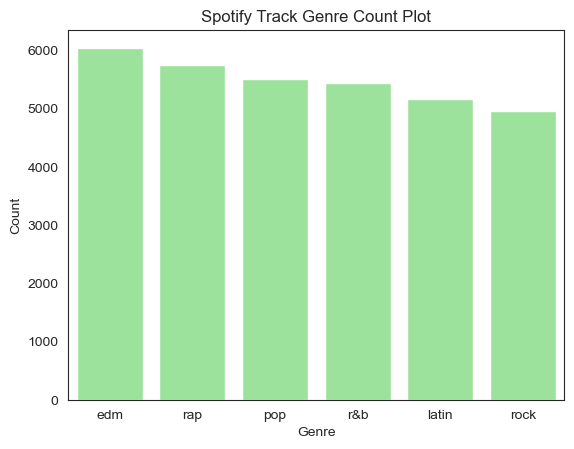

In [16]:
sns.set_style("white") # Set plot style

sns.countplot(data=spotify, x="playlist_genre", order=spotify['playlist_genre'].value_counts(ascending=False).index, color="lightgreen")

plt.title("Spotify Track Genre Count Plot") # Add a title
plt.xlabel("Genre") # Label x-axis
plt.ylabel("Count") # Label y-axis

# Show the plot
plt.show()

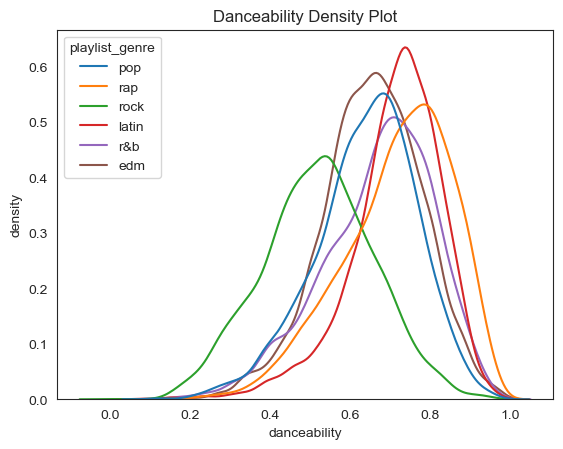

In [18]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="danceability", hue="playlist_genre") # Create a density plot

plt.title("Danceability Density Plot") # Add a title
plt.xlabel("danceability") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

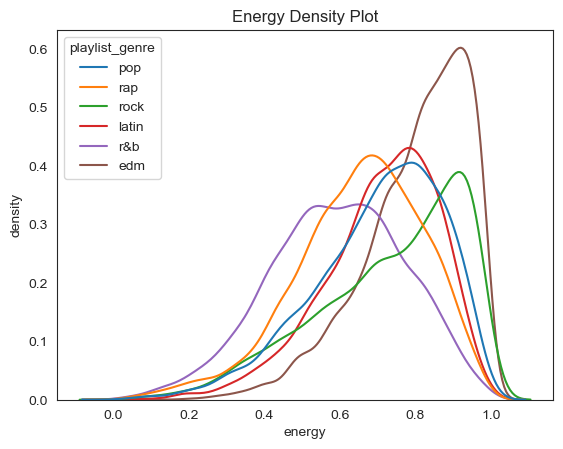

In [20]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="energy", hue="playlist_genre") # Create a density plot

plt.title("Energy Density Plot") # Add a title
plt.xlabel("energy") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

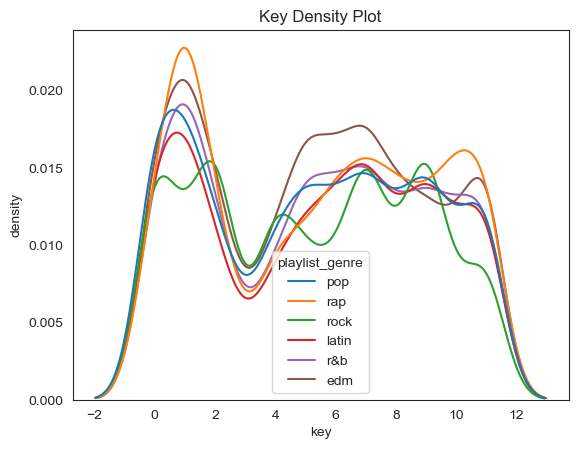

In [22]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="key", hue="playlist_genre") # Create a density plot

plt.title("Key Density Plot") # Add a title
plt.xlabel("key") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

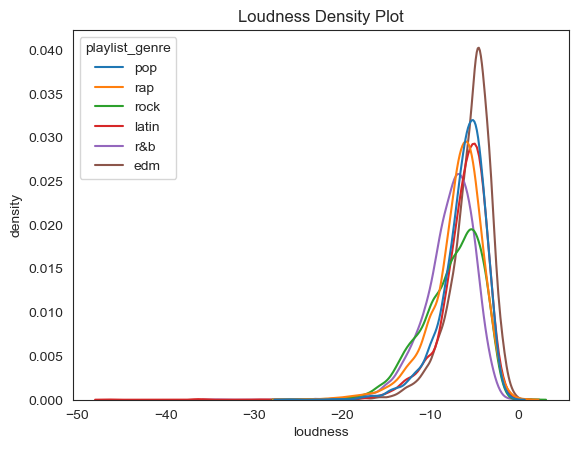

In [24]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="loudness", hue="playlist_genre") # Create a density plot

plt.title("Loudness Density Plot") # Add a title
plt.xlabel("loudness") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

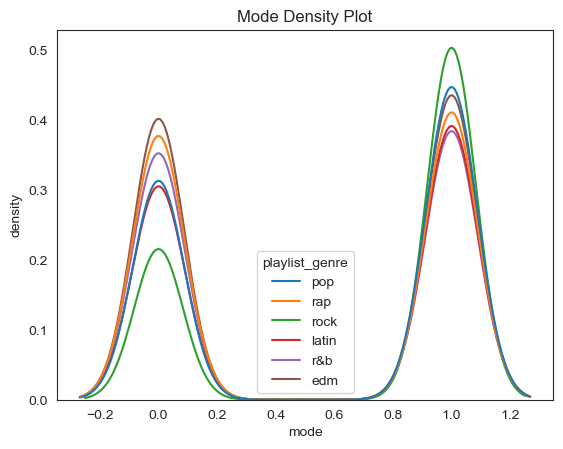

In [26]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="mode", hue="playlist_genre") # Create a density plot

plt.title("Mode Density Plot") # Add a title
plt.xlabel("mode") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

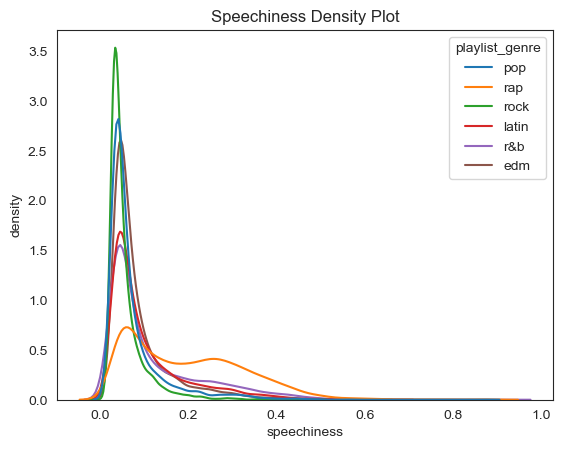

In [28]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="speechiness", hue="playlist_genre") # Create a density plot

plt.title("Speechiness Density Plot") # Add a title
plt.xlabel("speechiness") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

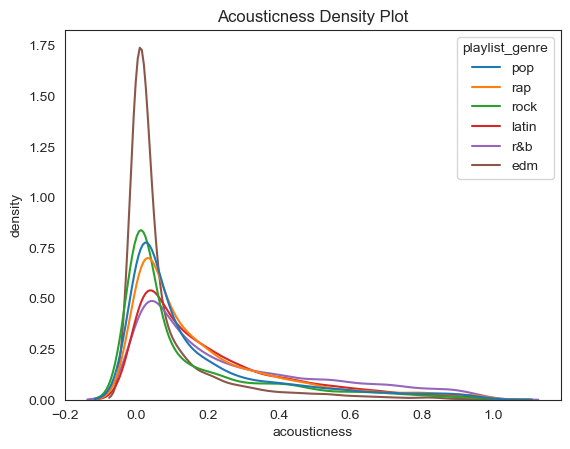

In [30]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="acousticness", hue="playlist_genre") # Create a density plot

plt.title("Acousticness Density Plot") # Add a title
plt.xlabel("acousticness") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

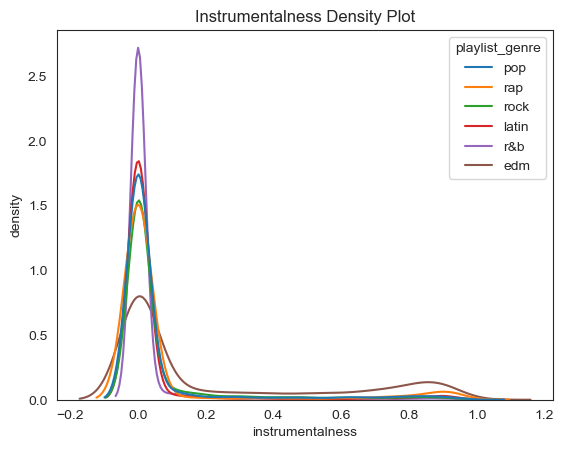

In [32]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="instrumentalness", hue="playlist_genre") # Create a density plot

plt.title("Instrumentalness Density Plot") # Add a title
plt.xlabel("instrumentalness") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

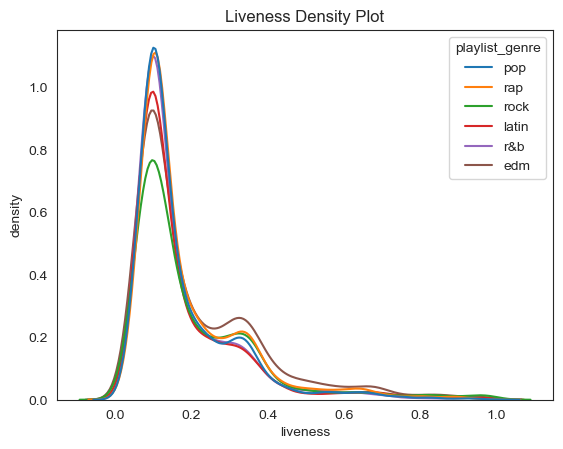

In [34]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="liveness", hue="playlist_genre") # Create a density plot

plt.title("Liveness Density Plot") # Add a title
plt.xlabel("liveness") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

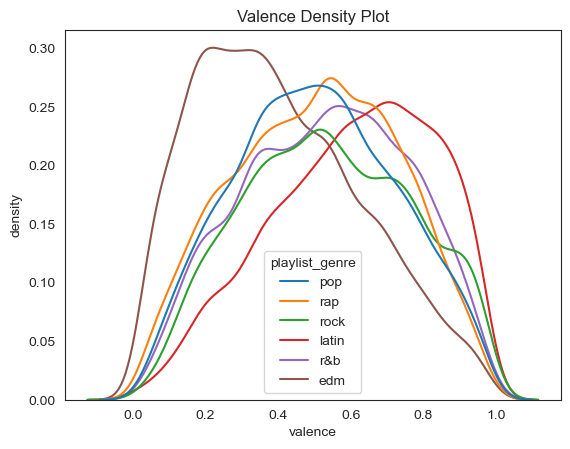

In [36]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="valence", hue="playlist_genre") # Create a density plot

plt.title("Valence Density Plot") # Add a title
plt.xlabel("valence") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

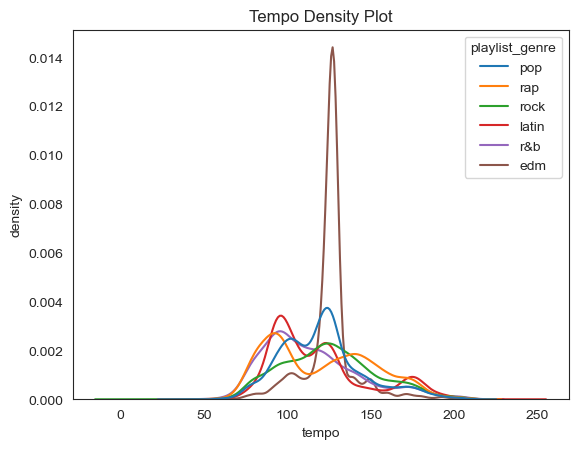

In [38]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="tempo", hue="playlist_genre") # Create a density plot

plt.title("Tempo Density Plot") # Add a title
plt.xlabel("tempo") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

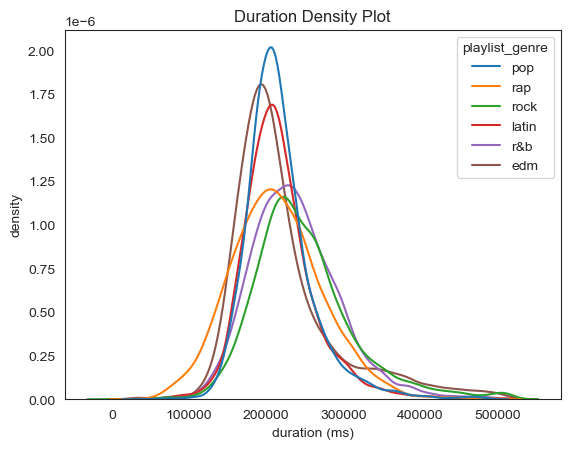

In [40]:
sns.set_style("white") # Set plot style

sns.kdeplot(data=spotify, x="duration_ms", hue="playlist_genre") # Create a density plot

plt.title("Duration Density Plot") # Add a title
plt.xlabel("duration (ms)") # Label x-axis
plt.ylabel("density") # Label y-axis

# Show the plot
plt.show()

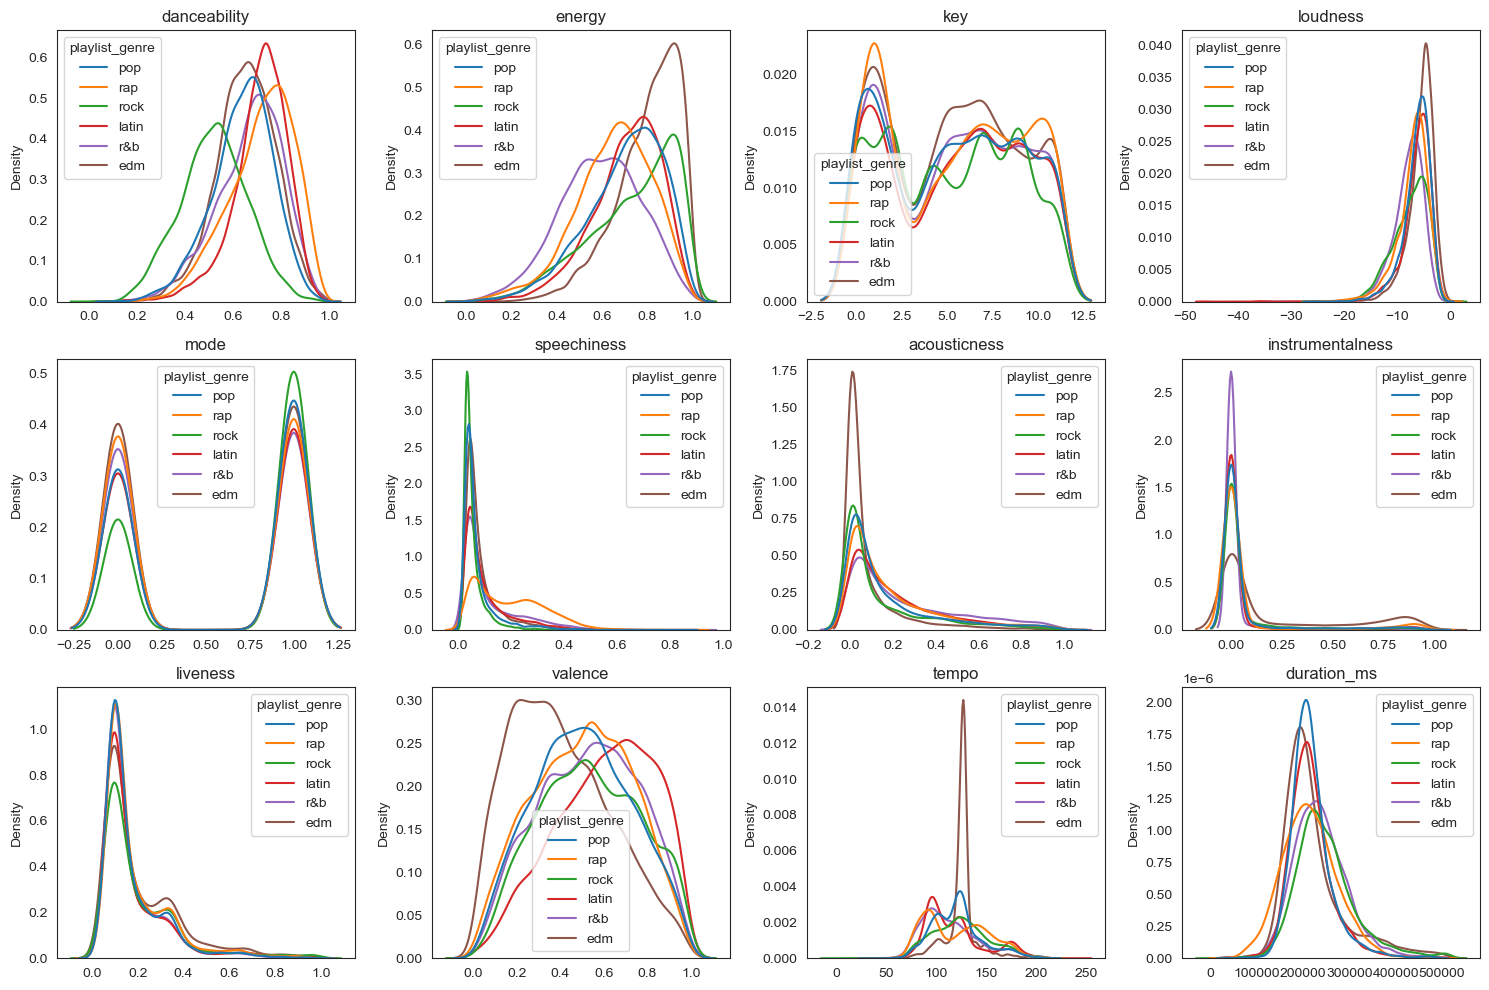

In [42]:
# Select audio feature columns
audio_features = spotify.columns[11:23]

# Determine subplot layout
n_rows = 3
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(audio_features):
    sns.kdeplot(data=spotify, x=col, hue = "playlist_genre", ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('') # Remove x-axis labels

plt.tight_layout()
plt.show()